<a href="https://colab.research.google.com/github/Mhu0824/Streamlit/blob/main/Test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-16-226dfce17e6f>:9: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(url, encoding='ISO-8859-1')
<ipython-input-16-226dfce17e6f>:9: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(url, encoding='ISO-8859-1')
<ipython-input-16-226dfce17e6f>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


Dataset Snapshot:
   imdbID                                     title  year     rating runtime  \
0       1                                Carmencita  1894  NOT RATED   1 min   
1       5                          Blacksmith Scene  1893    UNRATED   1 min   
2       3                            Pauvre Pierrot  1892        NaN   4 min   
3       8    Edison Kinetoscopic Record of a Sneeze  1894        NaN   1 min   
4      10  Employees Leaving the LumiÃ¯Â¿_e Factory  1895        NaN   1 min   

   Unnamed: 5  Unnamed: 6              director writer  \
0         NaN         NaN  William K.L. Dickson    NaN   
1         NaN         NaN  William K.L. Dickson    NaN   
2         NaN         NaN      Ã¯Â¿_ile Reynaud    NaN   
3         NaN         NaN  William K.L. Dickson    NaN   
4         NaN         NaN      Louis LumiÃ¯Â¿_e    NaN   

                       cast  ...  country  awards  lastupdated   type  \
0                Carmencita  ...      USA     NaN      03:45.0  movie   
1  Cha

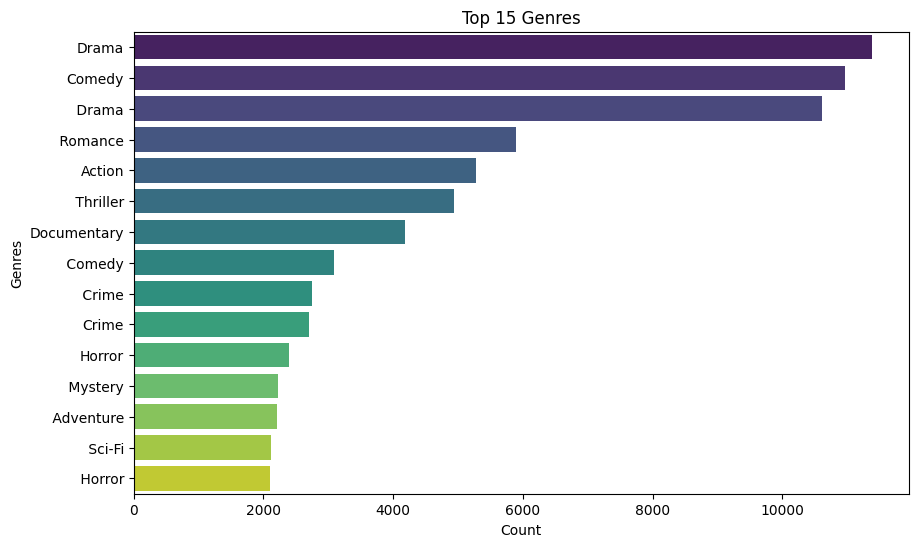

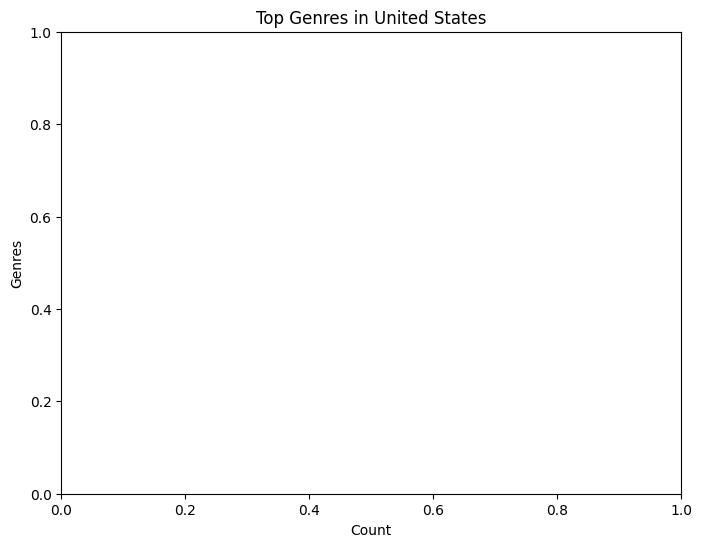

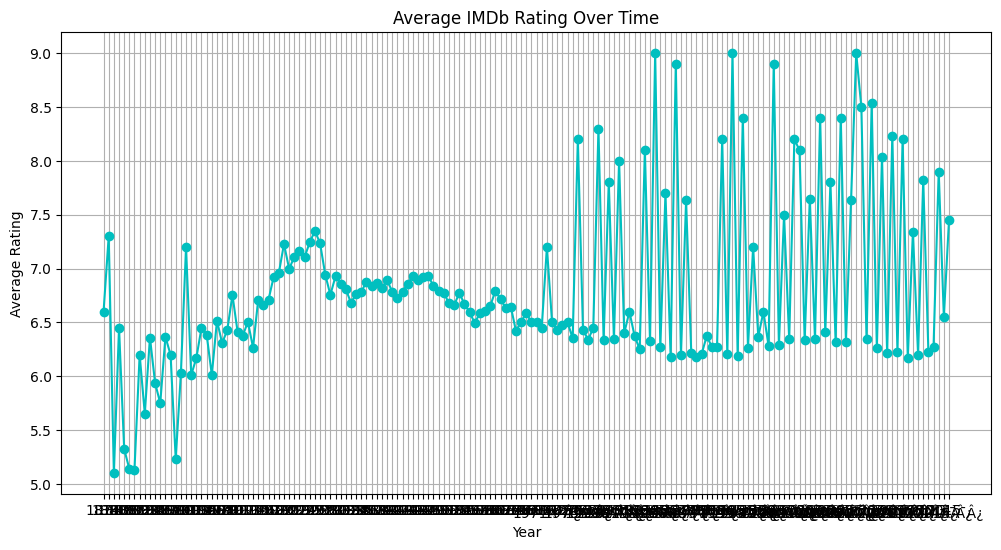

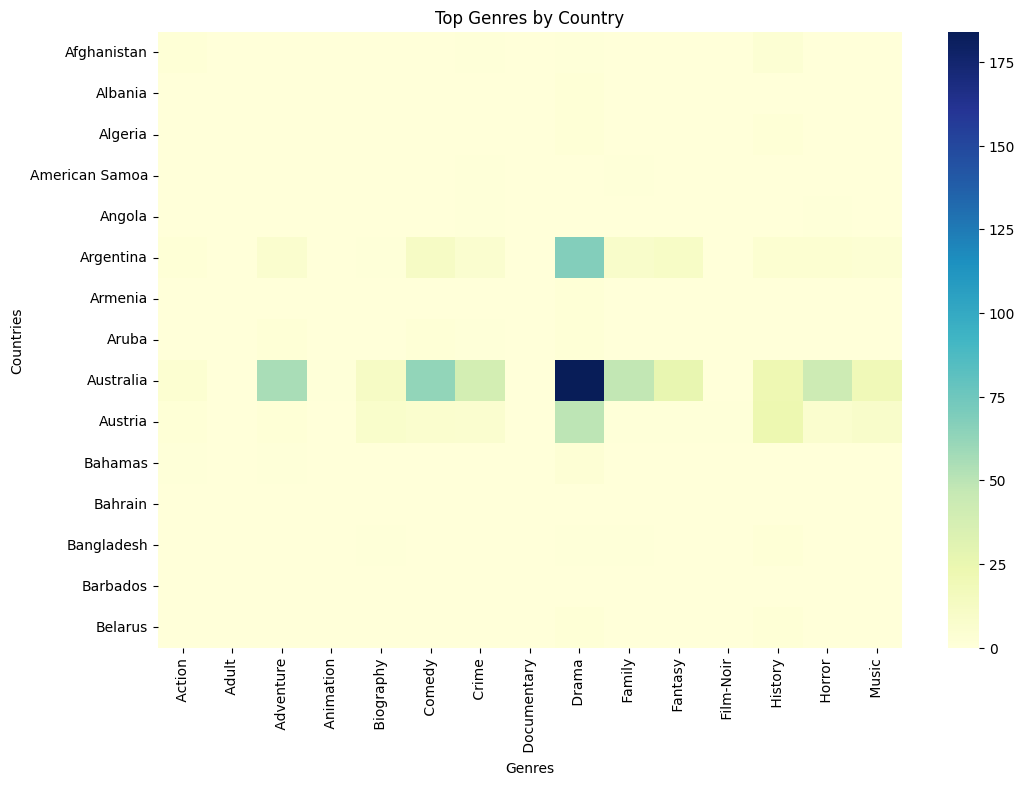

In [16]:
# 导入库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
def load_data():
    url = "https://raw.githubusercontent.com/Mhu0824/Streamlit/94a1553e28a662d831a0d8f224a2e167bdedb204/movies_dataset1.csv"
    return pd.read_csv(url, encoding='ISO-8859-1')

# 数据加载
df = load_data()

# 数据加载
df = load_data()

# 数据概览
print("Dataset Snapshot:")
print(df.head())

# 功能 1: 电影类型分布
genres = pd.concat([df['genre_1'], df['genre_2'], df['genre_3']]).dropna()
genre_counts = genres.value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title("Top 15 Genres")
plt.xlabel("Count")
plt.ylabel("Genres")
plt.show()

# 功能 2: 按国家和类型
selected_country = "United States"  # 替换为测试的国家
country_data = df[df['country'] == selected_country]
top_genres = pd.concat([country_data['genre_1'], country_data['genre_2'], country_data['genre_3']]).value_counts().head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="Blues_r")
plt.title(f"Top Genres in {selected_country}")
plt.xlabel("Count")
plt.ylabel("Genres")
plt.show()

# 功能 3: 按年份评分趋势
rating_trend = df.groupby('year')['imdbRating'].mean().dropna()

plt.figure(figsize=(12, 6))
plt.plot(rating_trend.index, rating_trend.values, marker='o', color='c')
plt.title("Average IMDb Rating Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid()
plt.show()

# 功能 4: 国家和类型热度图
df_exploded = df.copy()
df_exploded['country'] = df_exploded['country'].str.split(", ")
df_exploded = df_exploded.explode('country')
df_exploded = df_exploded.melt(id_vars=['country'], value_vars=['genre_1', 'genre_2', 'genre_3'], var_name='genre_type', value_name='genre').dropna()

heatmap_data = df_exploded.groupby(['country', 'genre']).size().unstack(fill_value=0).iloc[:15, :15]

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False)
plt.title("Top Genres by Country")
plt.xlabel("Genres")
plt.ylabel("Countries")
plt.show()
